In [3]:
import numpy as np    #importing libraries
import pandas as pd   
from pandas import Series, DataFrame  #importing pandas packages
import seaborn as sb  #importing seaborn package
import matplotlib.pyplot as plt  #importing matplotlib library
from pylab import rcParams   #importing pylab packages
import sklearn   #importing sklearn packages
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split  
from sklearn import metrics   
from sklearn.metrics import classification_report   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image    #importing packages to show decision tree
import pydot

In [4]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"   #loading dataset
titanic = pd.read_csv(url)
titanic.head()    #displaying top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns      #displaying columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#selecting only that columns which are necessary for survival prediction
titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
titanic.head()    #displaying top 5 rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [7]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)    #labeling sex columns

In [8]:
titanic.drop('Sex',axis=1,inplace=True)   #dropping column

In [9]:
#merging original dataframe with labeled encoded 'sex' column
titanic = pd.concat([titanic,sex],axis=1)

In [10]:
titanic.shape   #displaying size

(891, 7)

In [11]:
titanic.dropna(inplace=True)     #dropping records with nan values

In [12]:
titanic.shape   #displaying size

(714, 7)

C:\Users\Zubair\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Zubair\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Zubair\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Zubair\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


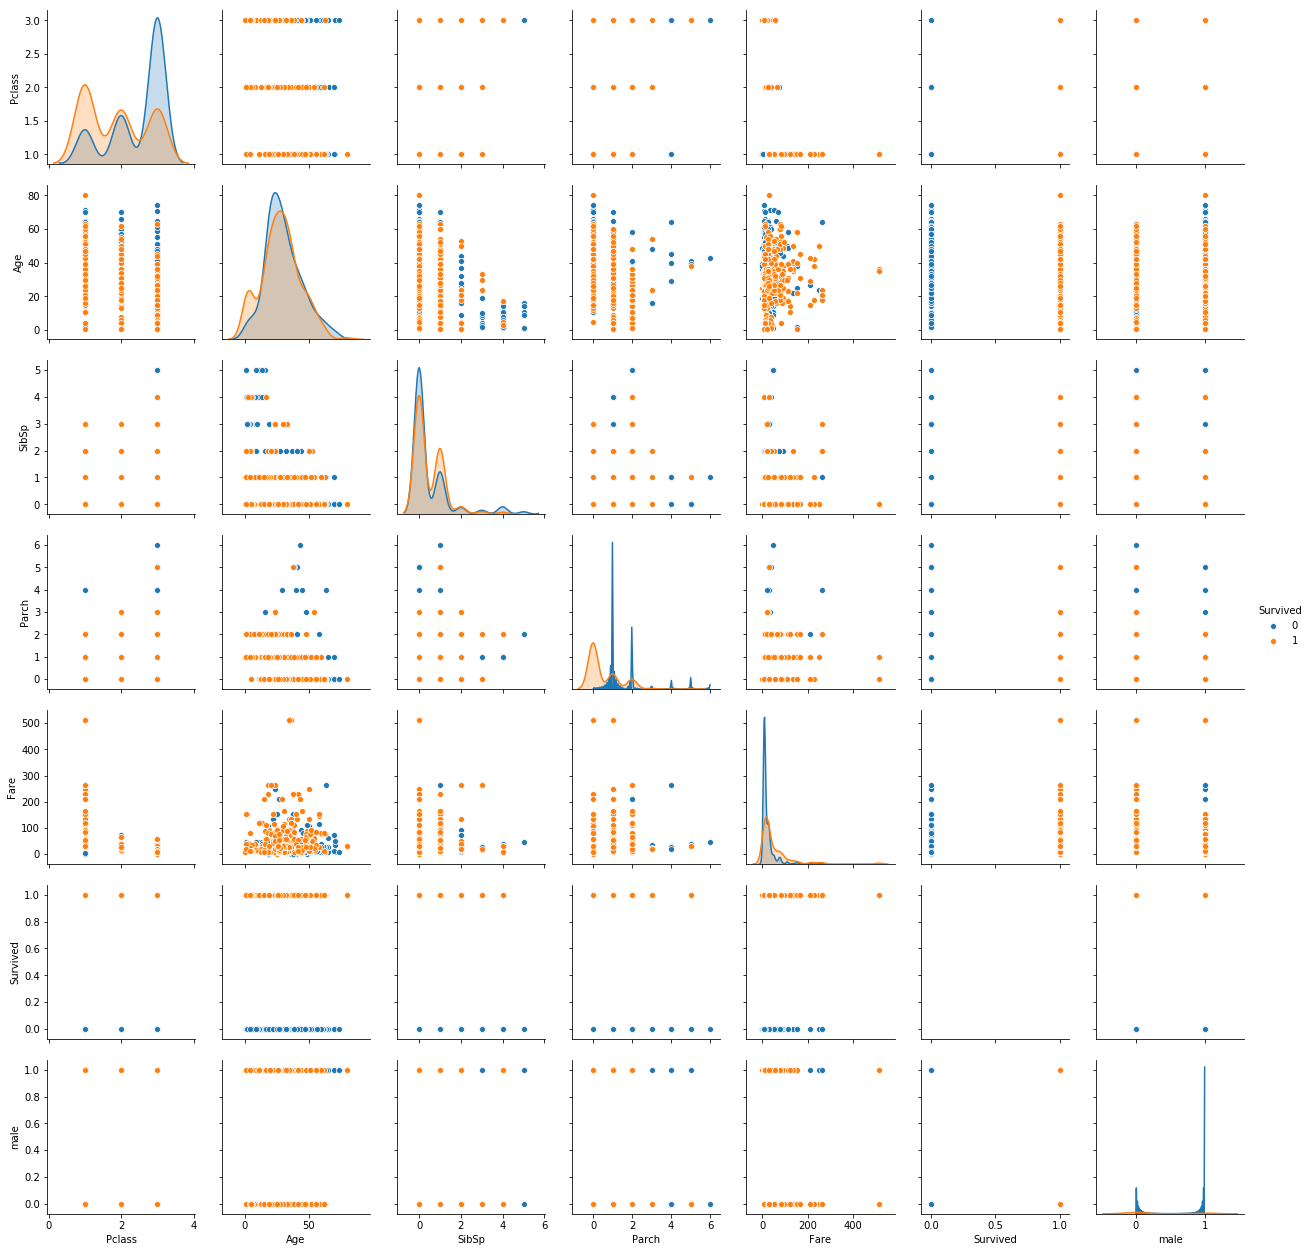

In [13]:
sb.pairplot(titanic,hue='Survived')    #plotting graph

In [14]:
#differentiating independent & dependent features in 'X' and 'y'
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [15]:
#spliting dataframe in training & test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [16]:
dtree = DecisionTreeClassifier(criterion='entropy')   #creating instance of DecisionTreeClassifier

In [17]:
dtree.fit(X_train,y_train)   #fitting model in decision tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)    #predicting result & storing in 'prediction' from model

In [19]:
#fitting predicted values & test output values in confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)    #getting accuracy

In [20]:
conf_matrix,accuracy    #displaying confusion matrix

(array([[93, 32],
        [22, 68]], dtype=int64), 0.7488372093023256)

In [21]:
print("Accuracy of the model is : "+ str(accuracy))      #printing

Accuracy of the model is : 0.7488372093023256


In [22]:
print(classification_report(y_test,predictions))    #printing the classification report

             precision    recall  f1-score   support

          0       0.81      0.74      0.78       125
          1       0.68      0.76      0.72        90

avg / total       0.75      0.75      0.75       215



In [23]:
print(conf_matrix)     #confusion matrix

[[93 32]
 [22 68]]


In [24]:
col_order = ['Survived']+titanic.iloc[:,0:5].columns.values.tolist()+titanic.iloc[:,6:].columns.values.tolist()
col_order    #columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [25]:
features = list(col_order[1:])   #getting all the features in predicting output
features    #showing

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

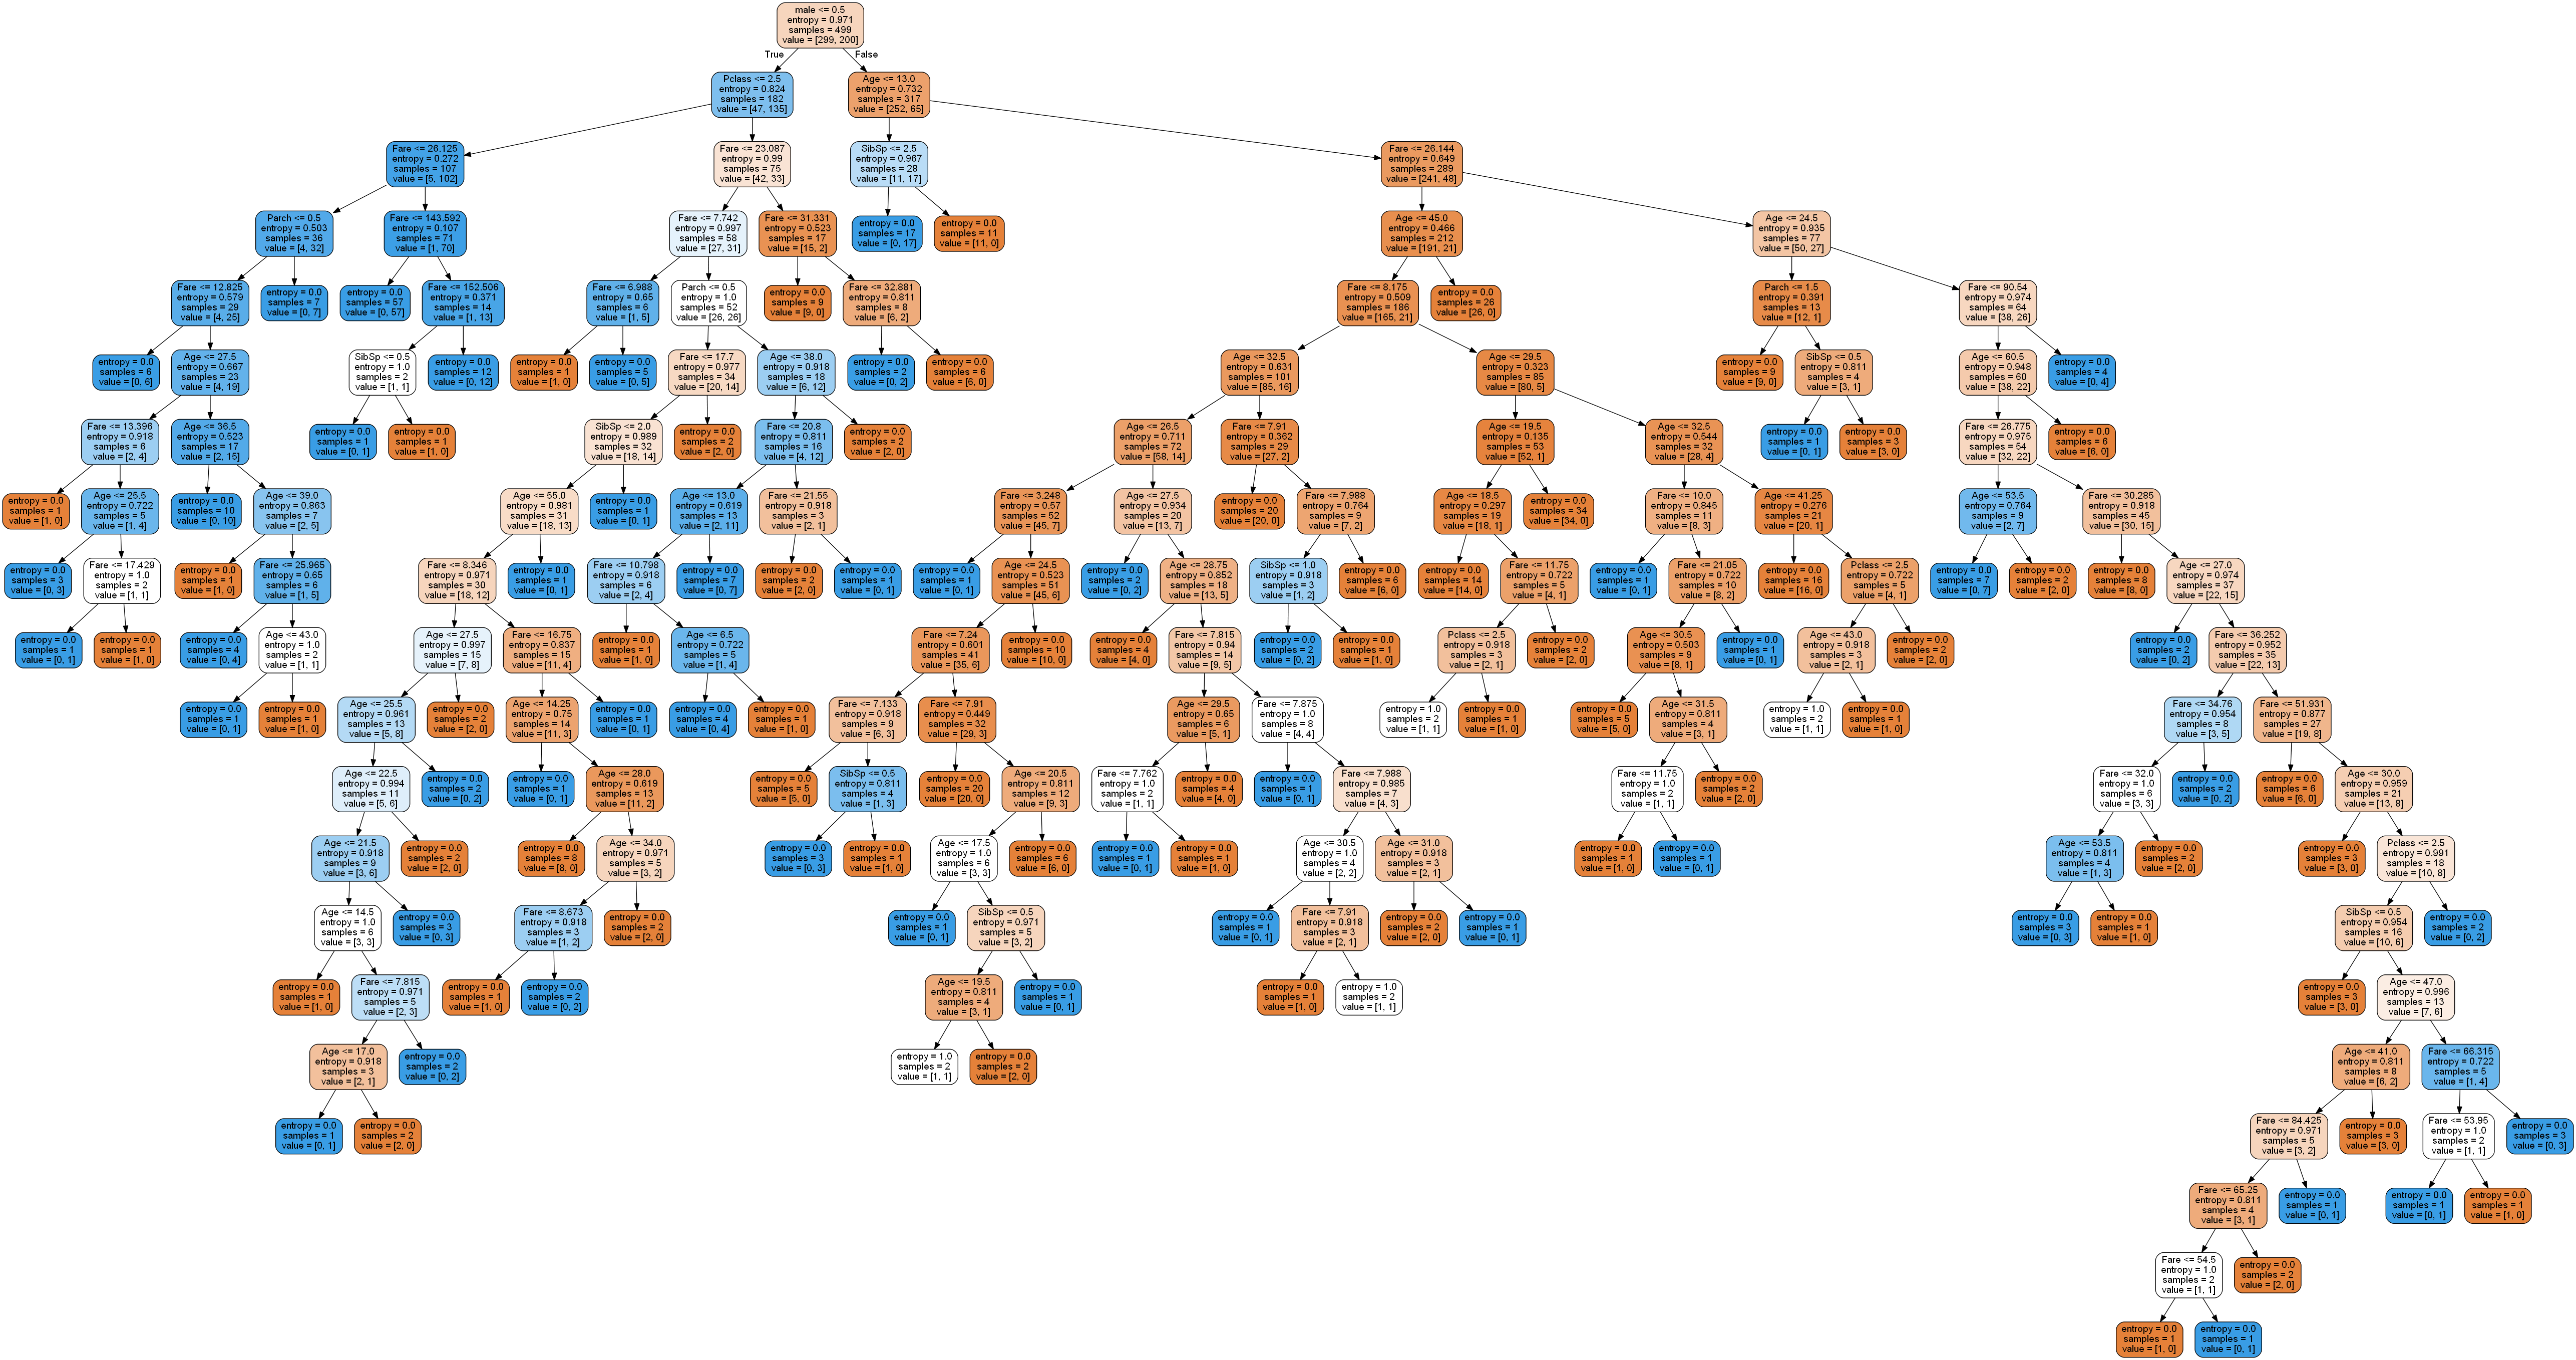

In [26]:
dot_data = StringIO()    #initializing instance
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)   #buliding tree
graph = pydot.graph_from_dot_data(dot_data.getvalue())     #creating graph
Image(graph[0].create_png())    #converting into Image 